# 🏥 Análise Lixo Hospitalar 

## 📚 Importando bibliotecas que serão utilizadas

In [97]:
import glob
import pandas as pd

## 📖 Lendo o arquivo csv
- Importando e lendo os arquivos

In [98]:
HOSPITAL_TRASH_RECORD_2022_DATA_PATH = glob.glob('data/2022/*.csv')
hospital_trash_2022_df = [pd.read_csv(file_path) for file_path in HOSPITAL_TRASH_RECORD_2022_DATA_PATH]
hospital_trash_2022_df

[   CONTROLE DIÁRIO DE PRODUÇÃO DE LIXO      Unnamed: 1  Unnamed: 2  \
 0                             1/1/2022             NaN         NaN   
 1                                SETOR              KG         NaN   
 2                                  NaN        CLASSE D         NaN   
 3                                  NaN  NÃO RECICLÁVEL         NaN   
 4                            NUTRIÇÃO              NaN         NaN   
 5                                  ADM          24.70          NaN   
 6                          AMBULATÓRIO         139.18          NaN   
 7                             FARMÁCIA          30.80          NaN   
 8                                  CME          27.13          NaN   
 9                                CECAE          24.05          NaN   
 10                               CEROF          12.80          NaN   
 11                           PEDIATRIA          31.90          NaN   
 12                                 DIP          25.12          NaN   
 13   

## 🫧 Limpeza dos Dados
1. Removendo linhas indesejadas
2. Organizando as colunas 
3. Tratando os dados ausentes 
4. Corrigindo os tipos de dados

### 1. Removendo linhas indesejadas
- Analisando se todas possuem a palavra 'Nutrição' ou 'NUTRIÇÃO'
- Removendo as primeiras linhas até a palavra 'Nutrição' ou 'NUTRIÇÃO'

In [99]:
keyword_one = 'NUTRIÇÃO' 
keyword_two = 'Nutrição'

def verify_word_in_column(list_dataframe_for_keyword, keyword_one, keyword_two):  #-> bool
    list_dataframe_as_string = list_dataframe_for_keyword.to_string()
    if keyword_one in list_dataframe_as_string or keyword_two in list_dataframe_as_string: 
        return True
    return False
    
all(verify_word_in_column(list_dataframe_for_keyword, keyword_one, keyword_two) for list_dataframe_for_keyword in hospital_trash_2022_df)

True

In [100]:
def delete_rows_unwanted(list_dataframe_for_delete_rows, keyword_one, keyword_two): #-> 
    for index, row in list_dataframe_for_delete_rows.iterrows():
        if any(keyword_one in str(valor) or keyword_two in str(valor) for valor in row):
            return list_dataframe_for_delete_rows.iloc[index:]
    return list_dataframe_for_delete_rows

hospital_trash_2022_df = [delete_rows_unwanted(list_dataframe_for_delete_rows, keyword_one, keyword_two) for list_dataframe_for_delete_rows in hospital_trash_2022_df]     
hospital_trash_2022_df

[   CONTROLE DIÁRIO DE PRODUÇÃO DE LIXO Unnamed: 1  Unnamed: 2  Unnamed: 3  \
 4                            NUTRIÇÃO         NaN         NaN         NaN   
 5                                  ADM     24.70          NaN         NaN   
 6                          AMBULATÓRIO    139.18          NaN         NaN   
 7                             FARMÁCIA     30.80          NaN         NaN   
 8                                  CME     27.13          NaN         NaN   
 9                                CECAE     24.05          NaN         NaN   
 10                               CEROF     12.80          NaN         NaN   
 11                           PEDIATRIA     31.90          NaN         NaN   
 12                                 DIP     25.12          NaN         NaN   
 13                                 CCA     29.30          NaN         NaN   
 14                                 CMA     36.40          NaN         NaN   
 15                                 CMB     28.18          NaN  

### 2. Organização de colunas
- Concatenando os dataframes usando números para simbolizar cada mês
- Renomeando colunas para nomes descritivos

In [101]:
hospital_trash_2022_df = pd.concat(hospital_trash_2022_df, keys=['02-2022', '03-2022', '04-2022', '08-2022', '07-2022', '06-2022', '05-2022', '10-2022', '09-2022', '12-2022'], verify_integrity=True)
hospital_trash_2022_df

CONTROLE DIÁRIO DE PRODUÇÃO DE LIXO Unnamed: 1  Unnamed: 2  \
02-2022 4                            NUTRIÇÃO         NaN         NaN   
        5                                  ADM     24.70          NaN   
        6                          AMBULATÓRIO    139.18          NaN   
        7                             FARMÁCIA     30.80          NaN   
        8                                  CME     27.13          NaN   
...                                        ...        ...         ...   
12-2022 21                                 NaN        NaN         NaN   
        22                                 NaN        NaN         NaN   
        23                                 NaN        NaN         NaN   
        24                                 NaN        NaN         NaN   
        25                               TOTAL    529.59          NaN   

            Unnamed: 3  Unnamed: 4 Unnamed: 5 Unnamed: 6  Unnamed: 7  \
02-2022 4          NaN         NaN        NaN        NaN         NaN   
        5          NaN         NaN        NaN        NaN         NaN   
        6          NaN         NaN        NaN        NaN         NaN   
        7          NaN         NaN        NaN        NaN         NaN   
        8          NaN         NaN        NaN        NaN         NaN   
...                ...         ...        ...        ...         ...   
12-2022 21         NaN         NaN        NaN        NaN         NaN   
        22         NaN         NaN        NaN        NaN         NaN   
        23         NaN         NaN        NaN        NaN         NaN   
        24         NaN         NaN        NaN        NaN         NaN   
        25         NaN         NaN        NaN     36.15          NaN   

           Unnamed: 8  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12  \
02-2022 4         NaN         NaN         NaN         NaN         NaN   
        5         NaN         NaN         NaN         NaN         NaN   
        6      27.90          NaN         NaN         NaN         NaN   
        7         NaN         NaN         NaN         NaN         NaN   
        8       0.55          NaN         NaN         NaN         NaN   
...               ...         ...         ...         ...         ...   
12-2022 21        NaN         NaN         NaN         NaN         NaN   
        22        NaN         NaN         NaN         NaN         NaN   
        23        NaN         NaN         NaN         NaN         NaN   
        24        NaN         NaN         NaN         NaN         NaN   
        25    162.15          NaN         NaN       5.65          NaN   

           Unnamed: 13  
02-2022 4          NaN  
        5          NaN  
        6          NaN  
        7          NaN  
        8          NaN  
...                ...  
12-2022 21         NaN  
        22         NaN  
        23         NaN  
        24         NaN  
        25        -     

[199 rows x 14 columns]

In [102]:
new_names_columns = ['SETOR',
                    'Classe_D-Nao_Reciclavel','Classe_D-Nao_Reciclavel', 'Classe_D-Nao_Reciclavel', 'Classe_D-Nao_Reciclavel',
                    'Classe_D-Reciclavel','Classe_D-Reciclavel','Classe_D-Reciclavel', 
                    'Classe_A (Infectante)', 'Classe_A (Infectante)', 
                    'Classe_E (Perfuro_Cortante)', 'Classe_E (Perfuro_Cortante)', 
                    'Classe_B (Medicamentos)', 'Classe_B (Medicamentos)']

hospital_trash_2022_df.columns = new_names_columns
hospital_trash_2022_df

SETOR  Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
02-2022 4     NUTRIÇÃO                       NaN                      NaN   
        5           ADM                   24.70                       NaN   
        6   AMBULATÓRIO                  139.18                       NaN   
        7      FARMÁCIA                   30.80                       NaN   
        8           CME                   27.13                       NaN   
...                 ...                      ...                      ...   
12-2022 21          NaN                      NaN                      NaN   
        22          NaN                      NaN                      NaN   
        23          NaN                      NaN                      NaN   
        24          NaN                      NaN                      NaN   
        25        TOTAL                  529.59                       NaN   

            Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
02-2022 4                       NaN                      NaN   
        5                       NaN                      NaN   
        6                       NaN                      NaN   
        7                       NaN                      NaN   
        8                       NaN                      NaN   
...                             ...                      ...   
12-2022 21                      NaN                      NaN   
        22                      NaN                      NaN   
        23                      NaN                      NaN   
        24                      NaN                      NaN   
        25                      NaN                      NaN   

            Classe_D-Reciclavel  Classe_D-Reciclavel  Classe_D-Reciclavel  \
02-2022 4                   NaN                  NaN                  NaN   
        5                   NaN                  NaN                  NaN   
        6                   NaN                  NaN                  NaN   
        7                   NaN                  NaN                  NaN   
        8                   NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
12-2022 21                  NaN                  NaN                  NaN   
        22                  NaN                  NaN                  NaN   
        23                  NaN                  NaN                  NaN   
        24                  NaN                  NaN                  NaN   
        25                  NaN               36.15                   NaN   

            Classe_A (Infectante)  Classe_A (Infectante)  \
02-2022 4                     NaN                    NaN   
        5                     NaN                    NaN   
        6                  27.90                     NaN   
        7                     NaN                    NaN   
        8                   0.55                     NaN   
...                           ...                    ...   
12-2022 21                    NaN                    NaN   
        22                    NaN                    NaN   
        23                    NaN                    NaN   
        24                    NaN                    NaN   
        25                162.15                     NaN   

           Classe_E (Perfuro_Cortante) Classe_E (Perfuro_Cortante)  \
02-2022 4                          NaN                         NaN   
        5                          NaN                         NaN   
        6                          NaN                         NaN   
        7                          NaN                         NaN   
        8                          NaN                         NaN   
...                                ...                         ...   
12-2022 21                         NaN                         NaN   
        22                         NaN                         NaN   
        23                         NaN          

### 3. Tratamento de Dados Ausentes
- Identificando dados ausentes

In [103]:
hospital_trash_2022_df.isnull().sum()

SETOR                            7
Classe_D-Nao_Reciclavel         51
Classe_D-Nao_Reciclavel        181
Classe_D-Nao_Reciclavel        199
Classe_D-Nao_Reciclavel        199
Classe_D-Reciclavel            178
Classe_D-Reciclavel            186
Classe_D-Reciclavel            199
Classe_A (Infectante)           68
Classe_A (Infectante)          189
Classe_E (Perfuro_Cortante)    190
Classe_E (Perfuro_Cortante)    197
Classe_B (Medicamentos)        190
Classe_B (Medicamentos)        198
dtype: int64

In [104]:
hospital_trash_2022_df.isnull()

SETOR  Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
02-2022 4   False                     True                     True   
        5   False                    False                     True   
        6   False                    False                     True   
        7   False                    False                     True   
        8   False                    False                     True   
...           ...                      ...                      ...   
12-2022 21   True                     True                     True   
        22   True                     True                     True   
        23   True                     True                     True   
        24   True                     True                     True   
        25  False                    False                     True   

            Classe_D-Nao_Reciclavel  Classe_D-Nao_Reciclavel  \
02-2022 4                      True                     True   
        5                      True                     True   
        6                      True                     True   
        7                      True                     True   
        8                      True                     True   
...                             ...                      ...   
12-2022 21                     True                     True   
        22                     True                     True   
        23                     True                     True   
        24                     True                     True   
        25                     True                     True   

            Classe_D-Reciclavel  Classe_D-Reciclavel  Classe_D-Reciclavel  \
02-2022 4                  True                 True                 True   
        5                  True                 True                 True   
        6                  True                 True                 True   
        7                  True                 True                 True   
        8                  True                 True                 True   
...                         ...                  ...                  ...   
12-2022 21                 True                 True                 True   
        22                 True                 True                 True   
        23                 True                 True                 True   
        24                 True                 True                 True   
        25                 True                False                 True   

            Classe_A (Infectante)  Classe_A (Infectante)  \
02-2022 4                    True                   True   
        5                    True                   True   
        6                   False                   True   
        7                    True                   True   
        8                   False                   True   
...                           ...                    ...   
12-2022 21                   True                   True   
        22                   True                   True   
        23                   True                   True   
        24                   True                   True   
        25                  False                   True   

            Classe_E (Perfuro_Cortante)  Classe_E (Perfuro_Cortante)  \
02-2022 4                          True                         True   
        5                          True                         True   
        6                          True                         True   
        7                          True                         True   
        8                          True                         True   
...                                 ...                          ...   
12-2022 21                         True                         True   
        22                         True                         True   
        23                         True                         True   
        24              

### 4. Identificação dos Tipos de Dados
- Identificando o tipo de dados de cada coluna

In [105]:
hospital_trash_2022_df.dtypes

SETOR                           object
Classe_D-Nao_Reciclavel         object
Classe_D-Nao_Reciclavel        float64
Classe_D-Nao_Reciclavel        float64
Classe_D-Nao_Reciclavel        float64
Classe_D-Reciclavel             object
Classe_D-Reciclavel             object
Classe_D-Reciclavel            float64
Classe_A (Infectante)           object
Classe_A (Infectante)          float64
Classe_E (Perfuro_Cortante)     object
Classe_E (Perfuro_Cortante)     object
Classe_B (Medicamentos)         object
Classe_B (Medicamentos)         object
dtype: object

## 📈 Séries Temporais
1. Aprimorando o DataFrame
2. Trabalhando com datas

### 1. Aprimorando o DataFrame
- Resetando os indexes
- Nomeando a coluna dos meses 

In [106]:
hospital_trash_2022_df = hospital_trash_2022_df.reset_index()
hospital_trash_2022_df

,level_0,level_1,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
0,02-2022,4,NUTRIÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-2022,5,ADM,24.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02-2022,6,AMBULATÓRIO,139.18,NaN,NaN,NaN,NaN,NaN,NaN,27.90,NaN,NaN,NaN,NaN,NaN
3,02-2022,7,FARMÁCIA,30.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02-2022,8,CME,27.13,NaN,NaN,NaN,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,12-2022,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,12-2022,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,12-2022,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,12-2022,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
hospital_trash_2022_df = hospital_trash_2022_df.rename(columns={'level_0': 'Mes'})
hospital_trash_2022_df = hospital_trash_2022_df.drop('level_1', axis=1)
hospital_trash_2022_df

,Mes,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
0,02-2022,NUTRIÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-2022,ADM,24.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02-2022,AMBULATÓRIO,139.18,NaN,NaN,NaN,NaN,NaN,NaN,27.90,NaN,NaN,NaN,NaN,NaN
3,02-2022,FARMÁCIA,30.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02-2022,CME,27.13,NaN,NaN,NaN,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Trabalhando com datas 
- Analisando o tipo de cada coluna
- Mudando a coluna `Mes` para o tipo `datetime` para elaboração das séries temporais
- Tranformando a coluna `Mes` para uma coluna indexada

In [108]:
hospital_trash_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Mes                          199 non-null    object 
 1   SETOR                        192 non-null    object 
 2   Classe_D-Nao_Reciclavel      148 non-null    object 
 3   Classe_D-Nao_Reciclavel      18 non-null     float64
 4   Classe_D-Nao_Reciclavel      0 non-null      float64
 5   Classe_D-Nao_Reciclavel      0 non-null      float64
 6   Classe_D-Reciclavel          21 non-null     object 
 7   Classe_D-Reciclavel          13 non-null     object 
 8   Classe_D-Reciclavel          0 non-null      float64
 9   Classe_A (Infectante)        131 non-null    object 
 10  Classe_A (Infectante)        10 non-null     float64
 11  Classe_E (Perfuro_Cortante)  9 non-null      object 
 12  Classe_E (Perfuro_Cortante)  2 non-null      object 
 13  Classe_B (Medicament

In [109]:
hospital_trash_2022_df.Mes = pd.to_datetime(hospital_trash_2022_df.Mes)
hospital_trash_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Mes                          199 non-null    datetime64[ns]
 1   SETOR                        192 non-null    object        
 2   Classe_D-Nao_Reciclavel      148 non-null    object        
 3   Classe_D-Nao_Reciclavel      18 non-null     float64       
 4   Classe_D-Nao_Reciclavel      0 non-null      float64       
 5   Classe_D-Nao_Reciclavel      0 non-null      float64       
 6   Classe_D-Reciclavel          21 non-null     object        
 7   Classe_D-Reciclavel          13 non-null     object        
 8   Classe_D-Reciclavel          0 non-null      float64       
 9   Classe_A (Infectante)        131 non-null    object        
 10  Classe_A (Infectante)        10 non-null     float64       
 11  Classe_E (Perfuro_Cortante)  9 non-null      

C:\Users\gabri\AppData\Local\Temp\ipykernel_27928\1657066503.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hospital_trash_2022_df.Mes = pd.to_datetime(hospital_trash_2022_df.Mes)


In [110]:
hospital_trash_2022_df.set_index('Mes', inplace=True)
hospital_trash_2022_df

,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
Mes,,,,,,,,,,,,,,
2022-02-01,NUTRIÇÃO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01,ADM,24.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01,AMBULATÓRIO,139.18,NaN,NaN,NaN,NaN,NaN,NaN,27.90,NaN,NaN,NaN,NaN,NaN
2022-02-01,FARMÁCIA,30.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01,CME,27.13,NaN,NaN,NaN,NaN,NaN,NaN,0.55,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
last_line_month_df = hospital_trash_2022_df.groupby('Mes').last()
last_line_month_df

,SETOR,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Nao_Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_D-Reciclavel,Classe_A (Infectante),Classe_A (Infectante),Classe_E (Perfuro_Cortante),Classe_E (Perfuro_Cortante),Classe_B (Medicamentos),Classe_B (Medicamentos)
Mes,,,,,,,,,,,,,,
2022-02-01,TOTAL,580.61,NaN,NaN,NaN,-,None,NaN,144.25,NaN,-,None,-,None
2022-03-01,TOTAL,334.56,NaN,NaN,NaN,-,None,NaN,72.50,1.90,-,None,-,None
2022-04-01,TOTAL,352.25,NaN,NaN,NaN,-,None,NaN,193.90,NaN,-,None,-,None
2022-05-01,TOTAL,209.90,NaN,NaN,NaN,-,None,NaN,123.85,NaN,-,None,-,None
2022-06-01,TOTAL,594.77,12.8,NaN,NaN,-,None,NaN,178.44,6.00,-,None,-,None
2022-07-01,TOTAL,825.76,19.7,NaN,NaN,175.60,1.9,NaN,-,NaN,-,None,-,None
2022-08-01,TOTAL,626.79,19.7,NaN,NaN,-,None,NaN,172.60,5.25,-,None,-,None
2022-09-01,TOTAL,626.79,19.7,NaN,NaN,-,None,NaN,172.60,5.25,-,None,-,None
2022-10-01,TOTAL,626.79,19.7,NaN,NaN,-,None,NaN,172.60,5.25,-,None,-,None


<Axes: xlabel='Mes'>

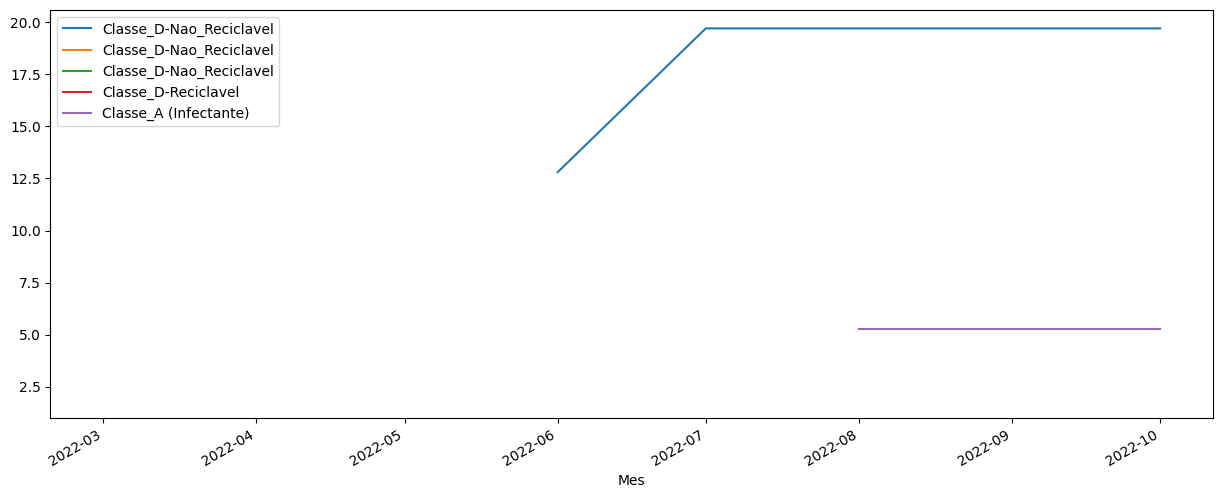

In [126]:
last_line_month_df.plot(figsize=(15, 6))